In [51]:
from keras.datasets import mnist
import numpy as np
"""
Reconocimiento de patrones - Practica 3
Hernández Navarro Armando

Clasificador binario para números 5
"""

###################### Base de datos MINST, normalización y balanceo

def balanced_mnist_set():
  # x_train y x_test contienen las imagenes mientras que
  # y_train y y_test contienen las etiquetas
  (x_train, y_train), (x_test, y_test) = mnist.load_data()

  # Se obtiene una muestra con igual número de: cincos vs no cincos para el conjunto de entrenamiento y el de test
  idx_y_train_5 = np.where(y_train == 5)[0]  # Indica los indices donde estan los 5's
  idx_y_train_n5 = np.where(y_train != 5)[0] # Indica los indices de todos los valores que no son 5

  # Creamos un array de indices aleatorios de valores no 5, con el tamaño del array de los valores 5
  # Selección, tamaño, replace, de forma que tengamos el mismo número de 5 y no 5
  idx_y_train_n5 = np.random.choice(idx_y_train_n5, idx_y_train_5.shape[0], replace=False)


  idx_y_train = np.concatenate([idx_y_train_5, idx_y_train_n5]) #Juntamos los indices donde estan 5 y no 5
  np.random.shuffle(idx_y_train) #Revolvemos

  x_train = x_train[idx_y_train] #
  y_train = y_train[idx_y_train] #

  idx_y_test_5 = np.where(y_test == 5)[0]
  idx_y_test_n5 = np.where(y_test != 5)[0]
  idx_y_test_n5 = np.random.choice(idx_y_test_n5, idx_y_test_5.shape[0], replace=False)

  idx_y_test = np.concatenate([idx_y_test_5, idx_y_test_n5])
  np.random.shuffle(idx_y_test)

  x_test = x_test[idx_y_test]
  y_test = y_test[idx_y_test]

  y_train_binary = (y_train == 5).astype(int)
  y_test_binary = (y_test == 5).astype(int)
  print("Números de 5 en entrenamiento: ", idx_y_train_5.size, " Número de NO 5 en entrenamiento: ", idx_y_train_n5.size )
  print("De ambos conjuntos se realiza una selección al azar")
  return (x_train, y_train_binary), (x_test, y_test_binary)




In [52]:
from keras.models import Sequential
from keras.layers import Flatten, Dense
from keras.callbacks import EarlyStopping


######################### Red neuronal multicapa

# Creamos el conjunto de datos balanceado
(x_train, y_train_binary), (x_test, y_test_binary) = balanced_mnist_set()

#Definimos earlyStopping
earlyStopping = EarlyStopping(monitor='val_loss', patience=10, verbose=1, restore_best_weights=True)

# Creamos la red
# Flatten es usado para pasar de imagenes de 28*28 a arrays unidimensionales
model = Sequential([
    Flatten(input_shape=(28, 28)), # Flatten para la entrada
    Dense(2, activation='sigmoid'), #Primer capa de 2 neuronas
    Dense(1,activation='relu') #Salida
])


model.compile(loss='binary_crossentropy', metrics=['accuracy'])

#Usamos batch size= 400 y validation split=0.15
history = model.fit(x_train, y_train_binary, epochs=40, verbose=1,
                    batch_size=400, validation_split=0.15, callbacks=[earlyStopping])



Números de 5 en entrenamiento:  5421  Número de NO 5 en entrenamiento:  5421
De ambos conjuntos se realiza una selección al azar
Epoch 1/40
24/24 [==============================] - 0s 7ms/step - loss: 0.9473 - accuracy: 0.6011 - val_loss: 0.6516 - val_accuracy: 0.6724
Epoch 2/40
24/24 [==============================] - 0s 3ms/step - loss: 0.6124 - accuracy: 0.7034 - val_loss: 0.5838 - val_accuracy: 0.7388
Epoch 3/40
24/24 [==============================] - 0s 3ms/step - loss: 0.5514 - accuracy: 0.7741 - val_loss: 0.5177 - val_accuracy: 0.8058
Epoch 4/40
24/24 [==============================] - 0s 3ms/step - loss: 0.5111 - accuracy: 0.8275 - val_loss: 0.4983 - val_accuracy: 0.8513
Epoch 5/40
24/24 [==============================] - 0s 3ms/step - loss: 0.4802 - accuracy: 0.8574 - val_loss: 0.4709 - val_accuracy: 0.8629
Epoch 6/40
24/24 [==============================] - 0s 3ms/step - loss: 0.4414 - accuracy: 0.8727 - val_loss: 0.4375 - val_accuracy: 0.8746
Epoch 7/40
24/24 [=============

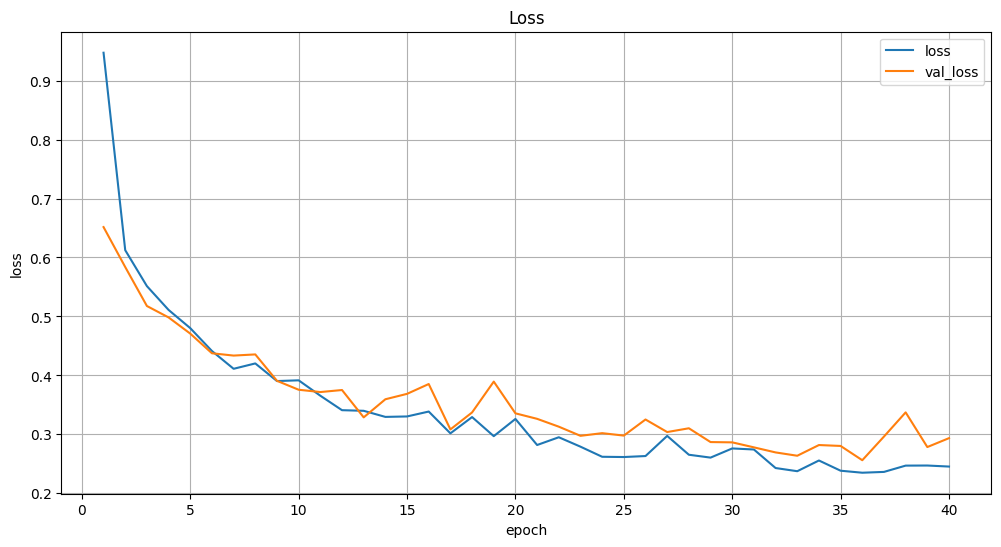

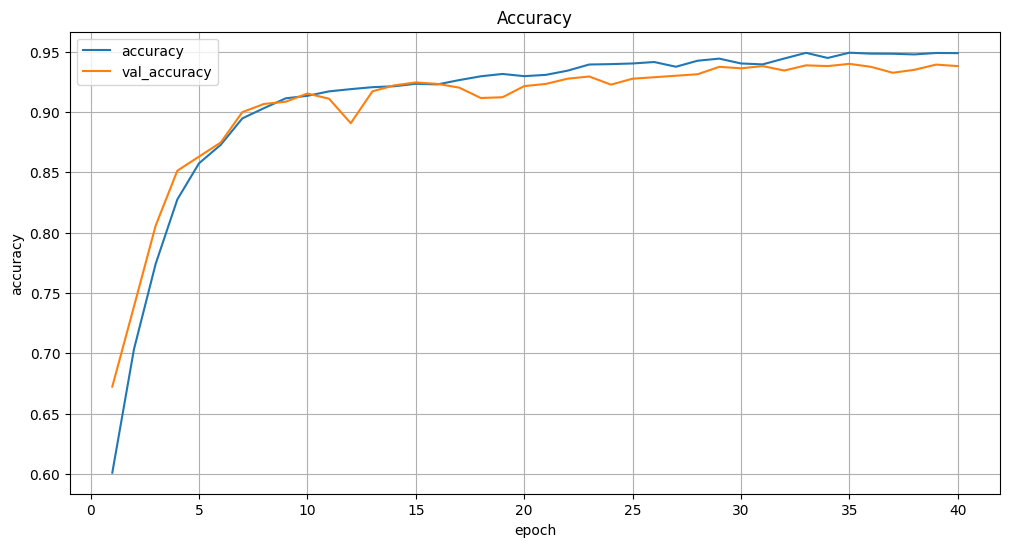

56/56 [==============================] - 0s 784us/step
Precicision score:  0.9790382244143033 
Recall score:  0.8901345291479821 
f1 score:  0.9324721080446272 
Precision score:  0.8992805755395683 
Recall Score:  0.9809417040358744 
f1 score:  0.9383378016085792


In [53]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, \
precision_score, recall_score,f1_score

### Graficación

loss_train = history.history['loss']
loss_val = history.history['val_loss']
accuracy_train = history.history['accuracy']
accuracy_val = history.history['val_accuracy']
epochs = range(1, len(loss_train) + 1)

# Loss
# Graficamos:
plt.figure(figsize=(12, 6))
plt.plot(epochs, loss_train, label='loss')
plt.plot(epochs, loss_val, label='val_loss')
plt.title('Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()
plt.grid(True)
plt.show()

# Accuracy
plt.figure(figsize=(12, 6))
plt.plot(epochs, accuracy_train, label='accuracy')
plt.plot(epochs, accuracy_val, label='val_accuracy')
plt.title('Accuracy')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()
plt.grid(True)
plt.show()


y_pred = (model.predict(x_test, verbose=1) >= 0.5).astype(int)[:,0]


# Recordar que poslabel da el treshhold
print("Precicision score: ", precision_score(y_test_binary, y_pred),
      "\nRecall score: ", recall_score(y_test_binary, y_pred),
      "\nf1 score: ", f1_score(y_test_binary, y_pred),
      "\n\nPrecision score: ", precision_score(y_test_binary, y_pred, pos_label=0),
      "\nRecall Score: ", recall_score(y_test_binary, y_pred, pos_label=0),
      "\nf1 score: ", f1_score(y_test_binary, y_pred, pos_label=0))

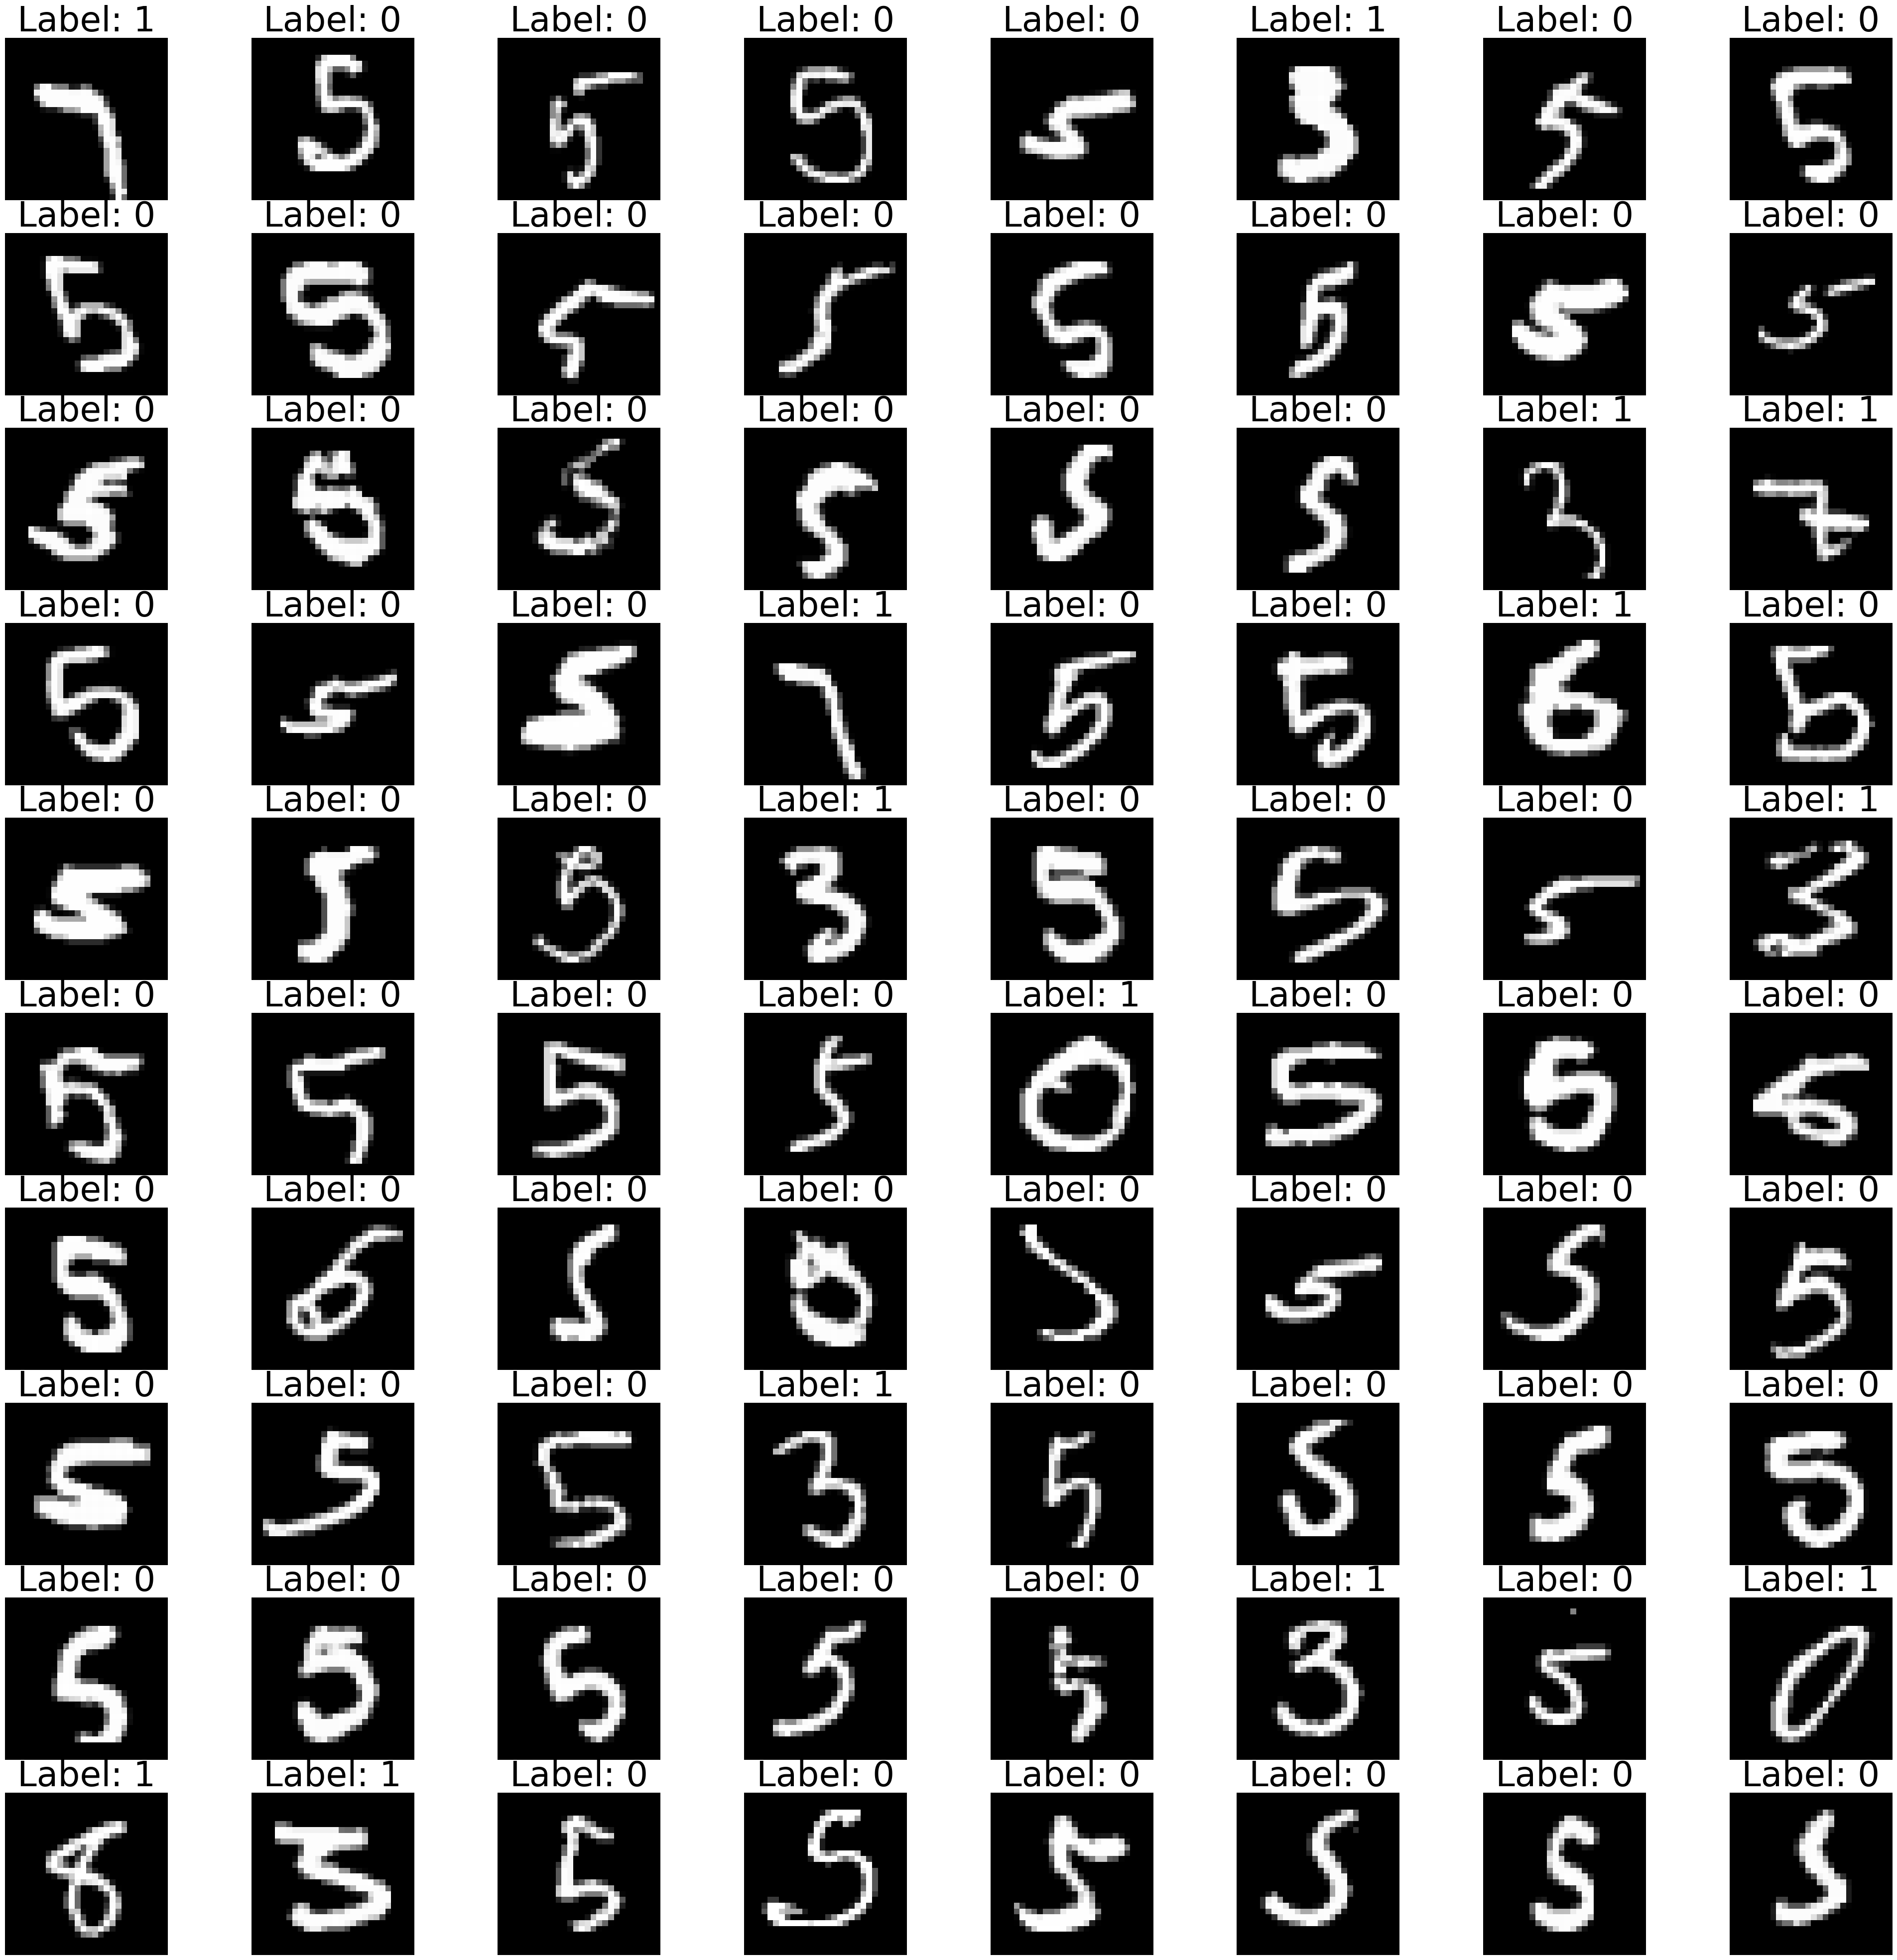

In [54]:
#### Mostramos errores

# Indices de los errores
miss = diff_indices = np.where(y_pred != y_test_binary)[0]


#Mostramos las imagenes y labels de los errores del modelo
plt.figure(figsize=(50,  50))
for i in range(80):
  fail = miss[i]
  plt.subplot(10,  8, i+1)
  plt.imshow(x_test[fail], cmap='gray')
  plt.title(f"Label: {y_pred[fail]}", fontdict = {'fontsize' : 50})
  plt.axis('off')
plt.show()

